# [CPSC 222](https://github.com/GonzagaCPSC222) Intro to Data Science
[Gonzaga University](https://www.gonzaga.edu/)

[Gina Sprint](http://cs.gonzaga.edu/faculty/sprint/)

# NLP and Data Science
What are our learning objectives for this lesson?
* Clean text to prepare for analyses
* Visualize word frequencies with bar charts and word clouds
* Compute and interpret Readability statistics
* Perform named entity recognition
* Calculate document similarity

Content used in this lesson is based upon information in the following sources:
* Intro to Python for Computer Science and Data Science by Deitel and Deitel

## Warm-up Task(s)
1. Please go to Zagweb and complete the course evaluation for this class
    * I would greatly appreciate a 100% response rate from all of you!!
1. Go to our Project folder on Google Drive
    * Open the EDITABLE Project Presentation Schedule and add two links
        1. Your Github repo (add gsprint23 if it is private and in your own account)
        1. Your report Jupyter Notebook (which should be included in the Github repo, I just want the link so I can open them all in order on presentation day... this is what you will present)
1. If you are interested in using natural language processing (NLP) for your project...
    * Instructions for installing NLP libraries is in https://github.com/GonzagaCPSC222/U7-Machine-Learning-NLP/blob/master/E%20Intro%20to%20Natural%20Language%20Processing.ipynb
        * Note: some of these libraries do not run on new Macs, so I have to run them on Google Colab
    * Download to your machine OR open the YelpReviewsPUBLIC.ipynb Notebook with **Google Colab** in the [222 Google Drive Folder](https://drive.google.com/drive/u/0/folders/1QXosDkeIf4Hnpzw03lR0hpZa3WmbbbUo)
    * Create an account on Yelp Developer: https://www.yelp.com/developers and get an API key
        * Paste your key in the `api_key` variable in your YelpReviewsPUBLIC.ipynb on Colab
        * Read about Yelp's Fusion API: https://www.yelp.com/developers/documentation/v3

## Today
* Announcements
    * Office hours next week: Monday and Tuesday 9:30am-11:30am
    * Final project Github repo is due Tuesday at midnight
        * Turn it in via the EDITABLE Project Presentation Schedule on Github
* Today
    * Course evaluations
    * Next class: Project presentations
        * See the Project Presentation Schedule for the schedule and deliverables (github repo link and report Jupyter Notebook link)
        * TBD
    * Confusion matrices
    * Final exam review

## Text Cleaning
* Applying common string operations, like converting all the text to lower case
* Fixing misspelled words
* Performing normalization using stemming, lemmatization, inflection, etc.
* Handling contractions
* Removing stop words

## Stop Words
A stop word is a common word in text that is often removed from text before analyzing because they typically do not provide useful information (e.g. "a", "the", "you", etc.)

In [1]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stops = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sprint/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from textblob import TextBlob

# remove stop words
gu_cs_text = "The Computer Science program at Gonzaga prepares students for careers and graduate study in the practice and science of computing. The program is built on a broad and rigorous foundation of science, mathematics, software engineering, and advanced computer science topics."
blob = TextBlob(gu_cs_text.lower())
no_stops_cs_text = []
for word in blob.words:
    if word not in stops:
        no_stops_cs_text.append(word)
print(no_stops_cs_text)

['computer', 'science', 'program', 'gonzaga', 'prepares', 'students', 'careers', 'graduate', 'study', 'practice', 'science', 'computing', 'program', 'built', 'broad', 'rigorous', 'foundation', 'science', 'mathematics', 'software', 'engineering', 'advanced', 'computer', 'science', 'topics']


## Visualizing Word Frequencies
Word frequencies are typically visualied with bar charts and word clouds

### Bar Charts

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

# word frequencies demo
# clean first 
blob = TextBlob(gu_cs_text.lower())
cleaned_cs_text = []
for word in blob.words:
    # remove stop words and contractions
    if word not in stops and "'" not in word:
        # get roots of words
        word = word.singularize()
        word = word.lemmatize()
        cleaned_cs_text.append(word)
print(cleaned_cs_text)
cleaned_blob = TextBlob(" ".join(cleaned_cs_text))
counts_ser = pd.Series(cleaned_blob.word_counts)
counts_ser = counts_ser.sort_values(ascending=False)

viridis = cm.get_cmap("viridis", len(counts_ser))
plt.bar(counts_ser.index, counts_ser, color=viridis.colors[::-1])
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

['computer', 'science', 'program', 'gonzaga', 'prepare', 'student', 'career', 'graduate', 'study', 'practice', 'science', 'computing', 'program', 'built', 'broad', 'rigorou', 'foundation', 'science', 'mathematics', 'software', 'engineering', 'advanced', 'computer', 'science', 'topic']


<Figure size 640x480 with 1 Axes>

### Word Clouds
This solution uses the `wordcloud` module which is built on top of `matplotlib`. Words that appear more frequently in the text show up in a word cloud in a larger font size.
* Note: `wordcloud` removes stop words before generating the word cloud

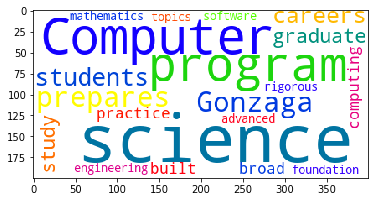

In [4]:
from wordcloud import WordCloud
plt.figure()
wordcloud = WordCloud(colormap="prism", background_color="white")
wordcloud = wordcloud.generate(gu_cs_text)
# write to file
#wordcloud.to_file("wordcloud.png")
# plot with matplotlib
plt.imshow(wordcloud)
plt.show()

## Readability Assessment w/Textatistic
Text readability is affected by the vocabulary used, sentence structure, sentence length, topic, etc. There are many formulas for assessing readability:
* char_count: number of characters in the text
* word_count: number of words in the text
* sent_count: number of sentences in the text
* sybl_count: number of syllables in the text
* notdalechall_count: count of words that are not on the Dale-Chall list (list of words understood by 80% of 5th graders); higher this number is compared to the total word count, the less readable the text is considered to be
* polysyblword_count: number of words with three or more syllables
* flesch_score: Flesch Reading Ease score, which can be mapped to a grade level (scores > 90 are readable by 5th graders; scores < 30 require a college degree)
* fleschkincaid_score: Flesch-Kincaid score, which corresponds to a specific grade level
* gunningfog_score: Gunning Fog index value, which corresponds to a specific grade level
* smog_score: Simple Measure of Gobbledygook (SMOG), which corresponds to the years of education requried to understand text
* dalechall_score: Dale-Chall score, which can be mapped to grade levels from 4 and below to college graduate (grade 16) and above
    * Note: this score is considered to be most reliable for a broad range of text types

In [5]:
from textatistic import Textatistic

readability = Textatistic(gu_cs_text)
for stat, value in readability.dict().items():
    print(stat, ":", value) 
print()

# calculate the average number of words per sentence, characters per word, and syllables per word
print("Average number of words per sentence:", readability.word_count / readability.sent_count)
print("Average characters per word:", readability.char_count / readability.word_count)
print("Average syllables per word:", readability.sybl_count / readability.word_count)

char_count : 232
word_count : 40
sent_count : 2
sybl_count : 69
notdalechall_count : 20
polysyblword_count : 6
flesch_score : 40.60000000000002
fleschkincaid_score : 12.565000000000005
gunningfog_score : 14.0
smog_score : 13.023866798666859
dalechall_score : 12.523499999999999

Average number of words per sentence: 20.0
Average characters per word: 5.8
Average syllables per word: 1.725


## Named Entity Recognition w/spaCy
Named entity recognition attempts to locate and categorize items like dates, times, quantities, places, people, things, organizations, etc.
* See https://spacy.io/api/annotation#named-entities for a list of spaCy's named entities

In [6]:
import spacy

nlp = spacy.load("en")
document = nlp(gu_cs_text)

for entity in document.ents:
    print(entity.text, "->", entity.label_)
# GPE is countries, cities, states

# display the named entities in "Paul J. Deitel is CEO of Deitel & Associates, Inc."
document = nlp("Paul J. Deitel is CEO of Deitel & Associates, Inc.")
for entity in document.ents:
    print(entity.text, "->", entity.label_)
# ORG is organization

Gonzaga -> GPE
Paul J. Deitel -> PERSON
Deitel & Associates, Inc. -> ORG


## Similarity Detection w/spaCy
Similarity detection is the process of analyzing documents to determine how alike they are, e.g. based on word frequencies, writing style, etc.

In [7]:
from pathlib import Path

# download text from project gutenberg
# remove header of text about project
doc1 = nlp(Path("files/romeojuliet.txt").read_text()) # http://www.gutenberg.org/cache/epub/1112/pg1112.txt
doc2 = nlp(Path("files/edwardthesecond.txt").read_text()) # http://www.gutenberg.org/cache/epub/20288/pg20288.txt
# similarity returns a value from 0.0 (not similar) to 1.0 (identical) indicating
# how similar the documents are
print(doc1.similarity(doc2))

0.922103052979811


/Users/sprint/opt/anaconda3/lib/python3.7/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


Note: the above warning can be fixed by downloading a larger model with word vectors. See the [spaCy documentation](https://spacy.io/usage/vectors-similarity) for more information.